Crop recommendation using ML

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Reading Data

In [ ]:
df=pd.read_csv("/content/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
df.shape

(2200, 8)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Checking for null values

In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

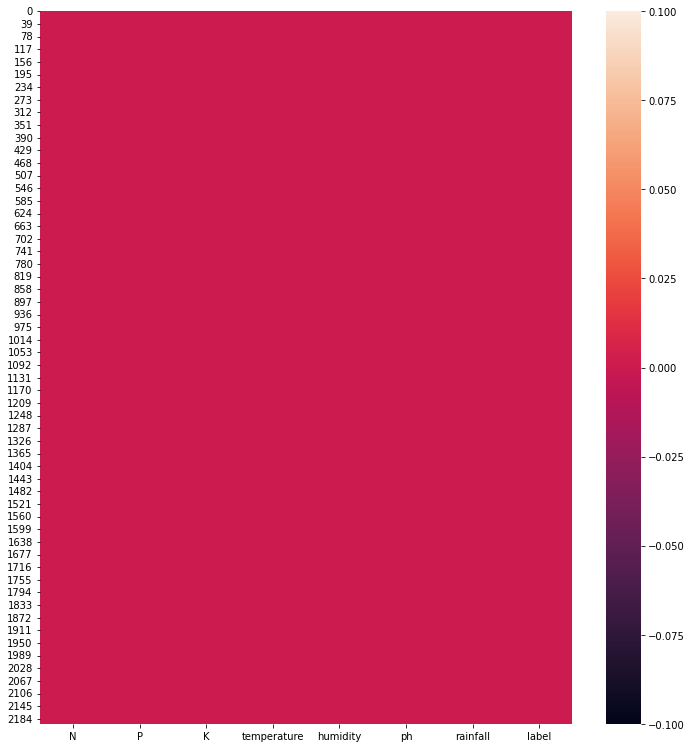

In [ ]:
plt.rcParams["figure.figsize"] = [10.00, 10.50]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(df.isnull())

checking distributions of columns

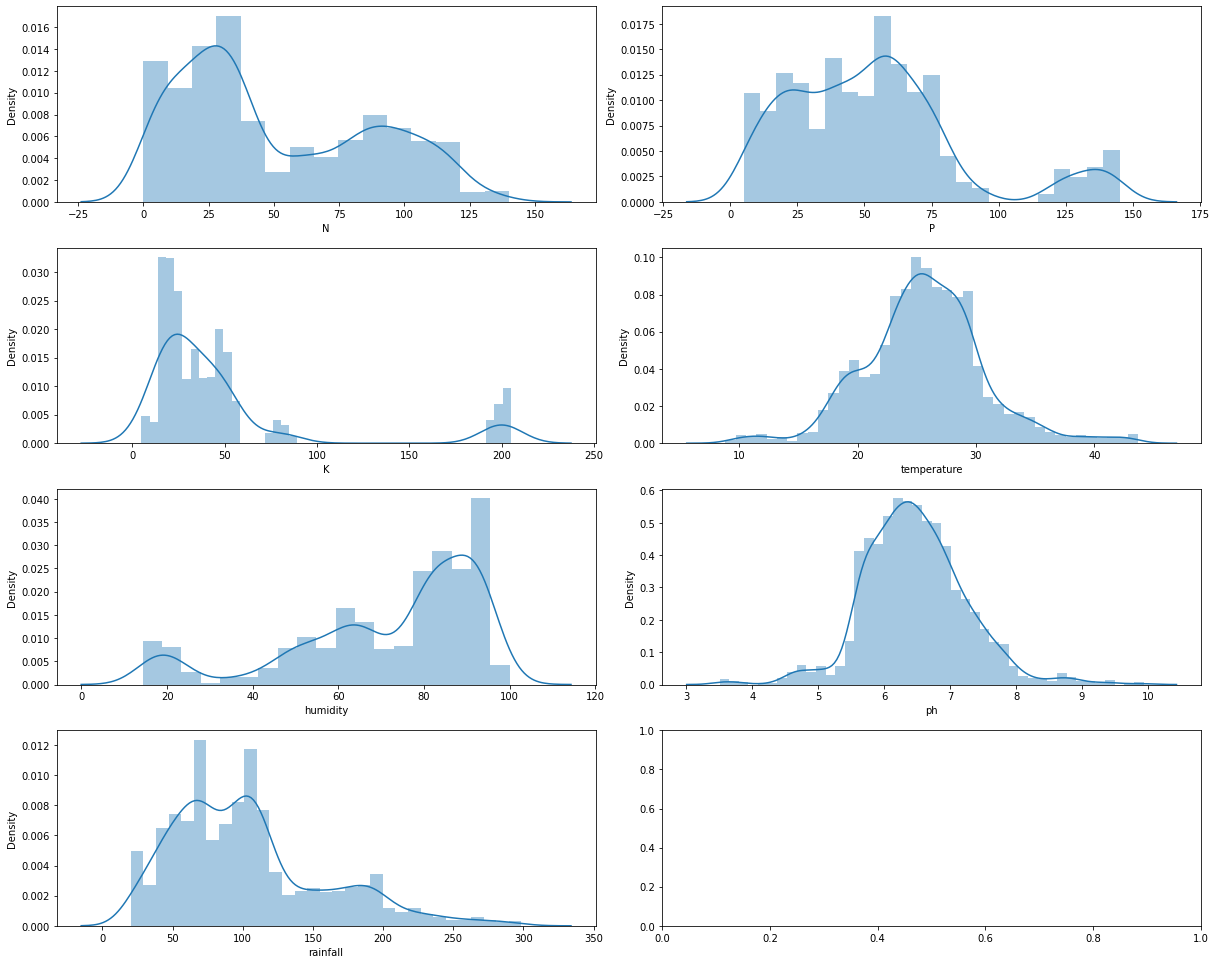

In [ ]:
plt.rcParams["figure.figsize"] = [17.00, 13.50]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(4, 2)
fig.subplots_adjust(hspace=2, wspace=2)
plt.subplot(4,2,1)
sns.distplot(df["N"])
plt.subplot(4,2,2)
sns.distplot(df["P"])
plt.subplot(4,2,3)
sns.distplot(df["K"])
plt.subplot(4,2,4)
sns.distplot(df["temperature"])
plt.subplot(4,2,5)
sns.distplot(df["humidity"])
plt.subplot(4,2,6)
sns.distplot(df["ph"])
plt.subplot(4,2,7)
sns.distplot(df["rainfall"])

Checking for an imbalanced dataset

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

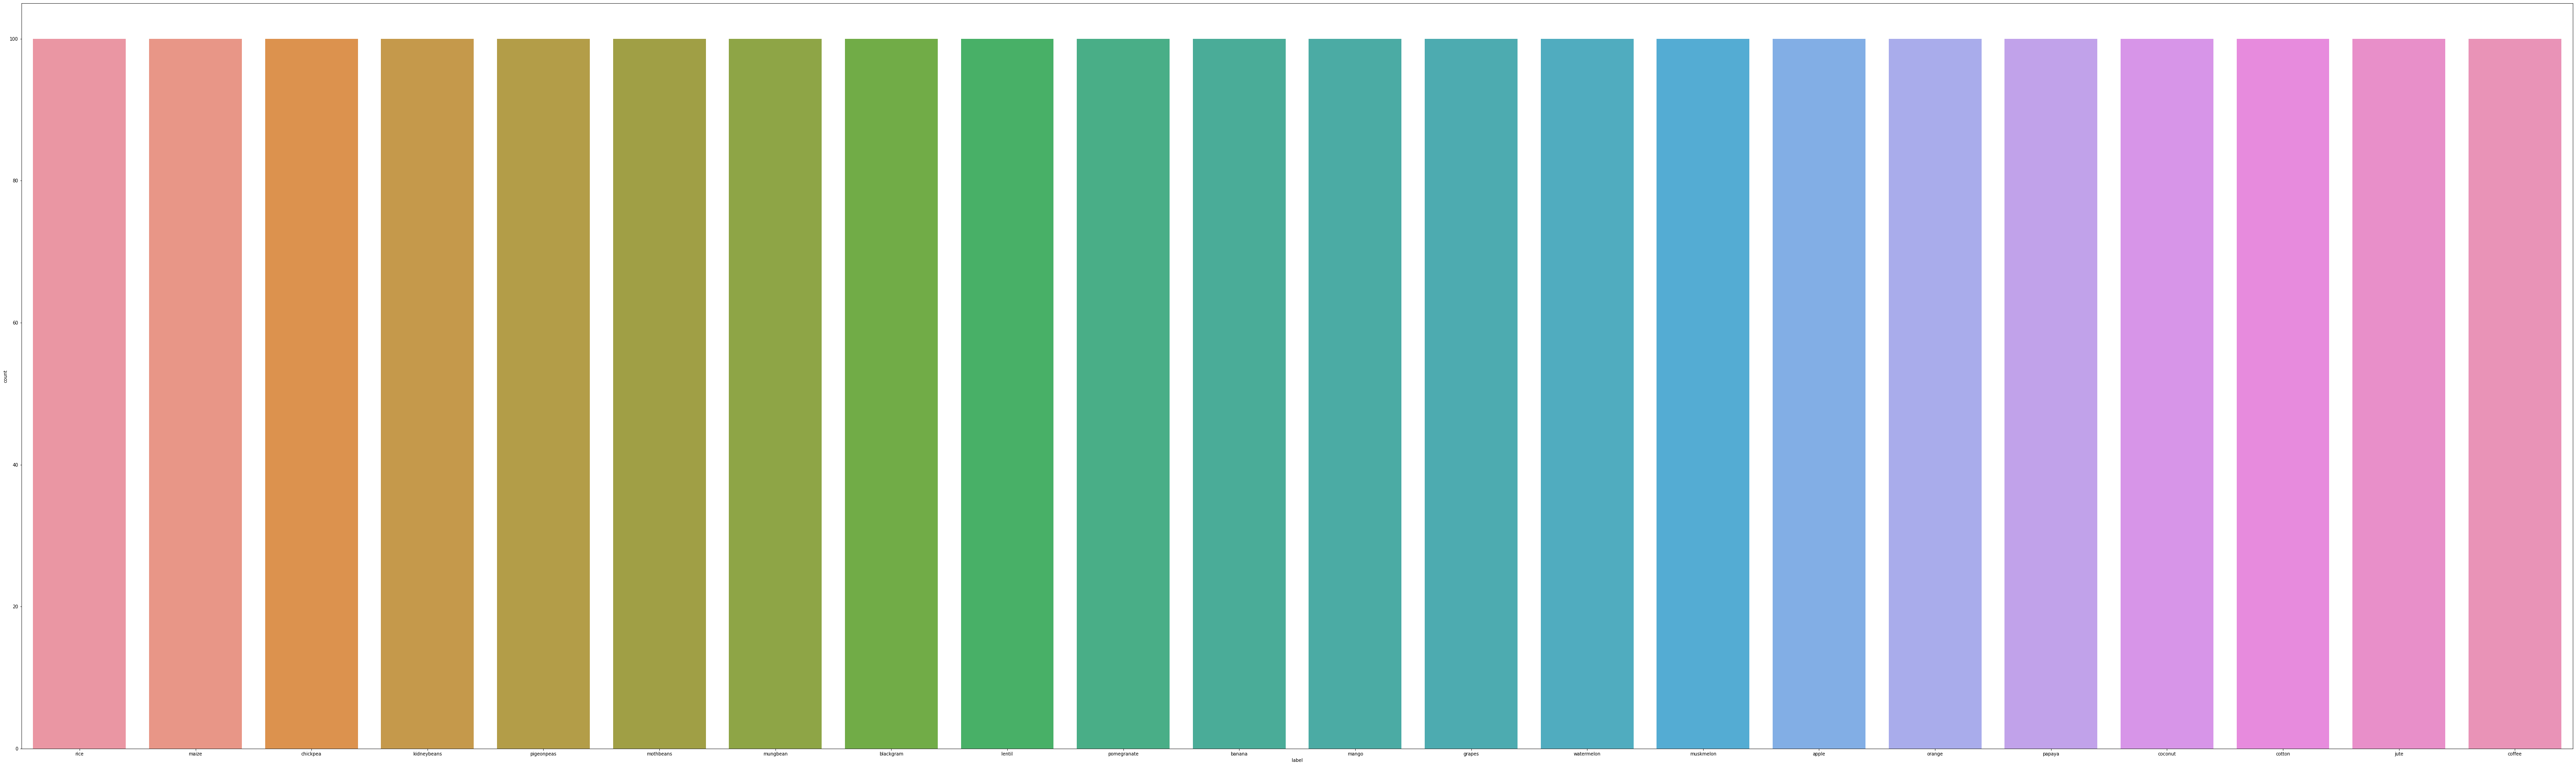

In [ ]:
f = plt.figure()
f.set_figwidth(100)
f.set_figheight(30)
sns.countplot(df["label"])

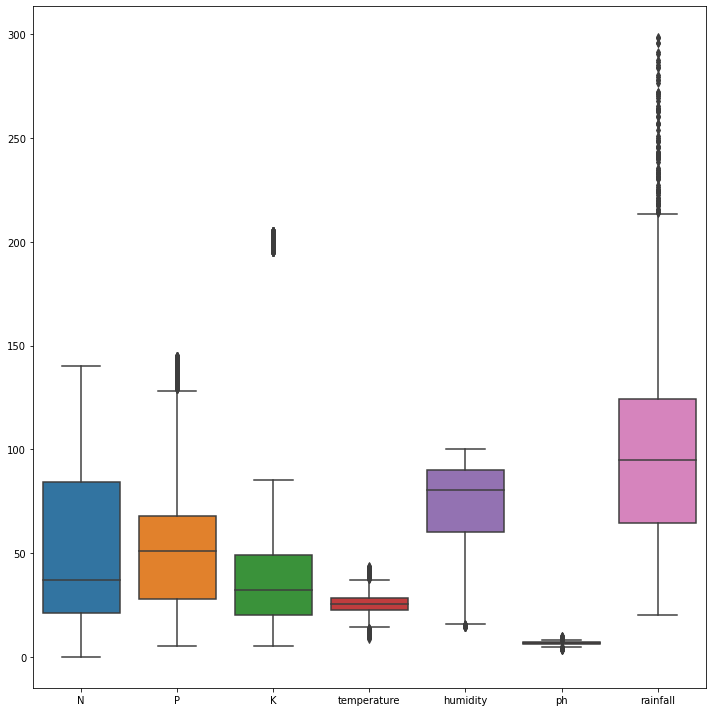

In [ ]:
a = plt.figure()
a.set_figwidth(10)
a.set_figheight(10)
sns.boxplot(data=df)

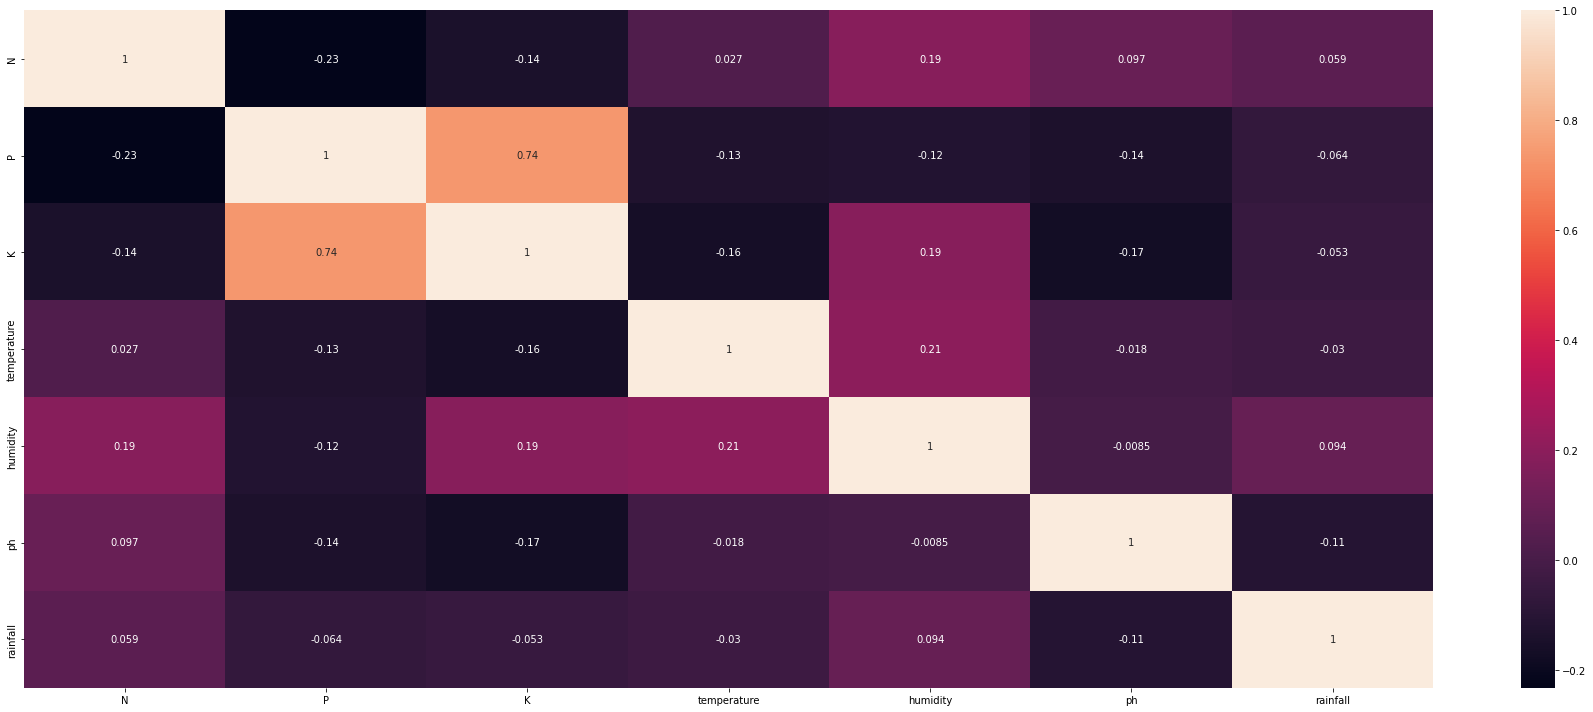

In [ ]:
sns.heatmap(df.corr(),annot=True)

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
target= lb.fit_transform(Y)

Seperating features and target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop("label",axis=1)
Y=df.label

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=3)
accuracy= []
model=[]

Trying Different ML Algo

1.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=3,max_depth=5)
DecisionTree.fit(X_train,Y_train)
pred_val = DecisionTree.predict(X_test)
x = metrics.accuracy_score(Y_test,pred_val)
accuracy.append(x)
model.append("Decision Tree")
print("accuracy of decision tree is",x*100)

accuracy of decision tree is 89.45454545454545


In [ ]:
cv_score = cross_val_score(DecisionTree, X, Y, cv =5)*100
print(cv_score)

[93.63636364 91.13636364 91.81818182 86.81818182 93.63636364]


2.Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB = GaussianNB()
NB.fit(X_train,Y_train)
pred_val = NB.predict(X_test)
x = metrics.accuracy_score(Y_test,pred_val)
accuracy.append(x)
model.append("NaiveBayes")
print("accuracy of NaiveBayes is",x*100)

accuracy of NaiveBayes is 99.45454545454545


In [ ]:
cv_score = cross_val_score(NB, X, Y, cv =5)*100
print(cv_score)

[99.77272727 99.54545455 99.54545455 99.54545455 99.09090909]


3.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression(random_state=3)
LR.fit(X_train,Y_train)
pred_val = LR.predict(X_test)
x = metrics.accuracy_score(Y_test,pred_val)
accuracy.append(x)
model.append("LogisticRegression")
print("accuracy of LogisticRegression is",x*100)

accuracy of LogisticRegression is 95.0909090909091


In [ ]:
cv_score = cross_val_score(LR, X, Y, cv =5)*100
print(cv_score)

[95.         96.59090909 94.77272727 96.81818182 94.31818182]


4)Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(n_estimators = 3, random_state =3 )
RF.fit(X_train, Y_train)
pred_val = RF.predict(X_test)
x = metrics.accuracy_score(Y_test,pred_val)
accuracy.append(x)
model.append("RandomForestClassifier")
print("accuracy of RandomForestClassifier is",x*100)

accuracy of RandomForestClassifier is 98.72727272727273


In [ ]:
cv_score = cross_val_score(RF, X, Y, cv =5)*100
print(cv_score)

[98.63636364 99.09090909 98.63636364 97.5        97.95454545]


Accuracy Comparision

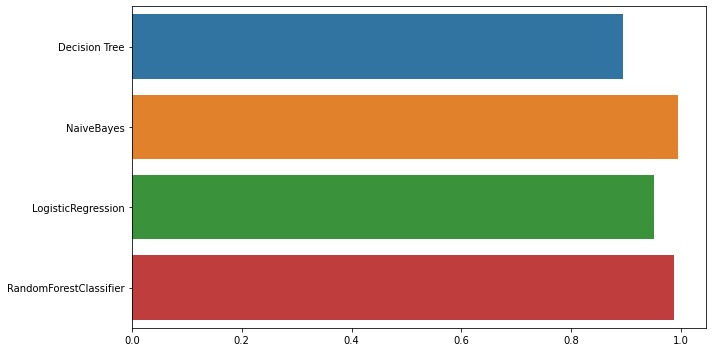

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
sns.barplot(x=accuracy,y=model)

In [ ]:
for i,j in zip(accuracy,model):
  print(i,j)

0.8945454545454545 Decision Tree
0.9945454545454545 NaiveBayes
0.9509090909090909 LogisticRegression
0.9872727272727273 RandomForestClassifier


Predicition

In [ ]:
arr=[[91,53,40,26,81,5,264]]
label = DecisionTree.predict(arr)
label

array(['rice'], dtype=object)

In [ ]:
arr=[[91,53,40,26,81,5,264]]
label = NB.predict(arr)
label

array(['rice'], dtype='<U11')

In [ ]:
arr=[[91,53,40,26,81,5,264]]
label = LR.predict(arr)
label

array(['rice'], dtype=object)

In [ ]:
arr=[[91,53,40,26,81,5,264]]
label = RF.predict(arr)
label

array(['rice'], dtype=object)

In [ ]:
arr=[[51,10,4,6,1,6,24]]
label = DecisionTree.predict(arr)
label

array(['mothbeans'], dtype=object)

In [ ]:
arr=[[51,10,4,6,1,6,24]]
label = LR.predict(arr)
label

array(['coffee'], dtype=object)